In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [126]:
train_df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Machine Learning\\datasets\\titanic\\train.csv')

In [127]:
print(train_df.info())
train_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [128]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Training Dataset Analysis:
1. Training dataset has 5 categorical and 7 numerical features out of which one is target variable viz. 'Survived'.
2. Cabin, Age & Embarked column has less entries, i.e. these columns have missing values.
3. Age is in fractions if its less than 1.
4. Age column has some outliers which may affect our model.
5. We have to process the NaN values in the Cabin column.
6. We have to convert the categorical values into numerical ones so that our model can built on top of it.

In [129]:
print('% of missing values in Age column are: ',(round((train_df['Age'].isnull().sum()/891)*100,2)),'%')
print('% of missing values in Cabin column are: ',(round((train_df['Cabin'].isnull().sum()/891)*100,2)),'%')
print('% of missing values in Embarked column are: ',(round((train_df['Embarked'].isnull().sum()/891)*100,2)),'%')

% of missing values in Age column are:  19.87 %
% of missing values in Cabin column are:  77.1 %
% of missing values in Embarked column are:  0.22 %


## From above %, we can say:
1. Our train dataset has too many values missing in the Cabin Column, so we should drop that column.
2. Embarked has very less % of missing values which can be filled with any of the three distinct values.
3. Age column should be smartly filled since it might be one of the key feature for our predictive model.

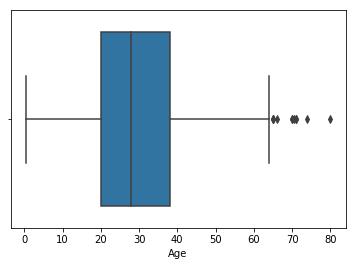

In [130]:
sns.boxplot(x='Age', data=train_df)

### General Logic says:
1. Age, Sex, Pclass must be one of the key feature for the determining whether a person survived or not.
2. There is no use of having PassengerId, Name and Ticket Number.
3. Pclass can be one of the important feature for our model as one who has paid more has high chance of being rescued.

In [131]:
# Let's drop the non-correlated columns... and also the Cabin column as mentioned above.
train_df.drop(labels=['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1,inplace=True)
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Out of 314 females, % of females survived:  0.74
Out of 577 males, % of males survived:  0.19


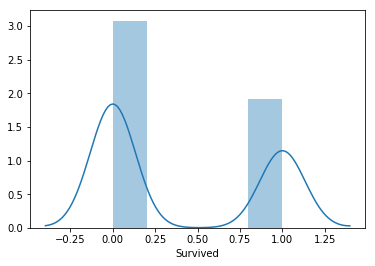

In [132]:
female = train_df[train_df['Sex'] == 'female']
male = train_df[train_df['Sex'] == 'male']
sns.distplot(train_df['Survived'])
print('Out of',len(female),'females, % of females survived: ', round(len(female[female['Survived'] == 1])/len(female),2))
print('Out of',len(male),'males, % of males survived: ', round(len(male[male['Survived'] == 1])/len(male),2))

Text(0.5, 1.0, 'Female')

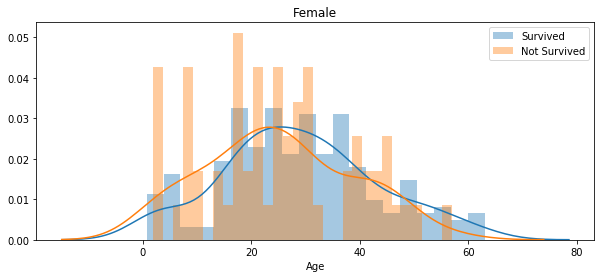

In [133]:
females_survived = female[female['Survived']==1]
females_survived = pd.DataFrame(females_survived)
females_not_survived = female[female['Survived']==0]
females_not_survived = pd.DataFrame(females_not_survived)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 4))
ax = sns.distplot(females_survived.Age.dropna(), bins=20, label = 'Survived')
ax = sns.distplot(females_not_survived.Age.dropna(), bins=30, label = 'Not Survived')
ax.legend()
ax.set_title('Female')

Text(0.5, 1.0, 'Male')

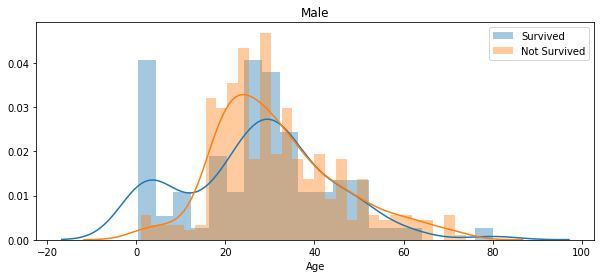

In [134]:
males_survived = male[male['Survived']==1]
males_survived = pd.DataFrame(males_survived)
males_not_survived = male[male['Survived']==0]
males_not_survived = pd.DataFrame(males_not_survived)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 4))
ax = sns.distplot(males_survived.Age.dropna(), bins= 20, label = 'Survived')
ax = sns.distplot(males_not_survived.Age.dropna(), bins=30, label = 'Not Survived')
ax.legend()
ax.set_title('Male')

In [51]:
train_df = train_df.dropna(axis = 0, subset =['Embarked'])
print('Shape:',train_df.shape)

Shape: (889, 8)


In [135]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


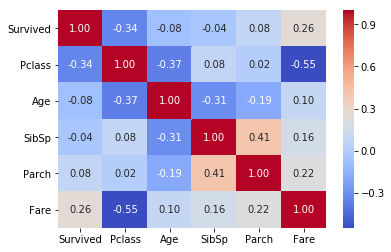

In [136]:
sns.heatmap(train_df.corr(), cmap='coolwarm', fmt='.2f', annot=True)

In [137]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean(),'\n')
print(train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False),'\n')
print(train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False),'\n')
print(train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False),'\n')
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000 

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [138]:
train_df['Embarked'] = train_df["Embarked"].fillna('C')

In [158]:
train_df['Embarked'] = train_df.Embarked.apply(lambda x: x.replace('C','0'))
train_df['Embarked'] = train_df.Embarked.apply(lambda x: x.replace('S','1'))
train_df['Embarked'] = train_df.Embarked.apply(lambda x: x.replace('Q','2'))

In [139]:
test_df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Machine Learning\\datasets\\titanic\\test.csv')

In [140]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [141]:
test_df.drop(labels=['PassengerId', 'Name', 'Cabin', 'Ticket'],axis=1, inplace=True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [142]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [143]:
# Fill the missing value of Fare column in testing data with median value of Fare column of training data
test_df["Fare"] = test_df["Fare"].fillna(train_df["Fare"].median())

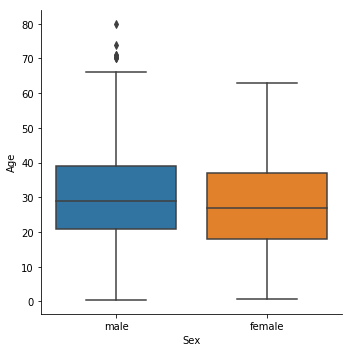

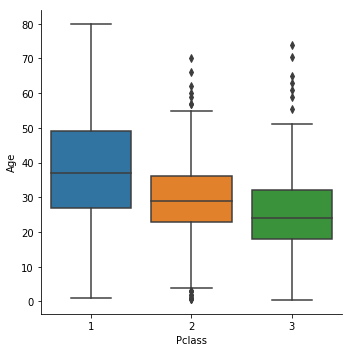

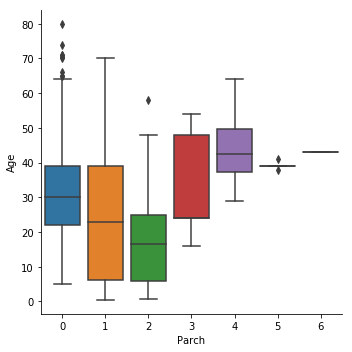

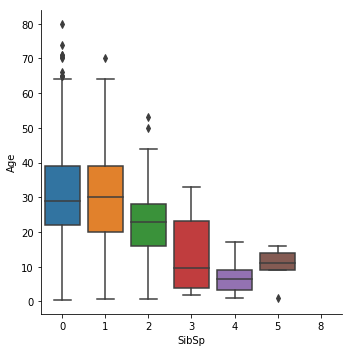

In [144]:
# Catplot is used for plotting catergoical variables on the plot...
sns.catplot(x="Sex", y="Age", data=train_df, kind="box")
sns.catplot(x="Pclass", y="Age", data=train_df,kind="box")
sns.catplot(x="Parch", y="Age", data=train_df,kind="box")
sns.catplot(x="SibSp", y="Age", data=train_df,kind="box")

In [145]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

## Now, convert the categorical variables into numerical variables using pd.dummies 

In [146]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lblen = LabelEncoder()

In [156]:
# Firstly fit the label values...
lblen.fit(train_df['Embarked'])
# Now transform the values into encoded label values....
lblen.transform(train_df['Embarked'])

# Fits and transforms the label values in one step...
#lblen.fit_transform(train_df['Sex'])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
5,0,3,1,29.699118,0,0,8.4583,Q
6,0,1,1,54.000000,0,0,51.8625,S
7,0,3,1,2.000000,3,1,21.0750,S
8,1,3,0,27.000000,0,2,11.1333,S
9,1,2,0,14.000000,1,0,30.0708,C


In [185]:
# Converting the categorical variables into numerical using apply method
train_df['Sex'] = train_df.Sex.apply(lambda x: x.replace('female','0'))
train_df['Sex'] = train_df.Sex.apply(lambda x: x.replace('male','1'))
pd.to_numeric(train_df['Sex'])
pd.to_numeric(train_df['Embarked'])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,1
3,1,1,0,35.000000,1,0,53.1000,1
4,0,3,1,35.000000,0,0,8.0500,1
5,0,3,1,29.699118,0,0,8.4583,2
6,0,1,1,54.000000,0,0,51.8625,1
7,0,3,1,2.000000,3,1,21.0750,1
8,1,3,0,27.000000,0,2,11.1333,1
9,1,2,0,14.000000,1,0,30.0708,0


In [189]:
X = train_df.drop(train_df['Survived'])
len(train_df['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

In [190]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (177, 8)
Shape of X_test: (712, 8)
Shape of y_train: (177,)
Shape of y_test: (712,)


In [191]:
models = [DecisionTreeClassifier(), LogisticRegression(), ExtraTreeClassifier(), SVC(), GaussianNB()]
model_names = ['DecisionTreeClassifier', 'LogisticRegression', 'ExtraTreeClassifier', 'Support Vector Machines(SVC)', 'GaussianNB(Naive Bayes)']
i = 0
for model in models:
    model_obj = model
    model_obj.fit(X_train, y_train)
    predictions = model_obj.predict(X_test)
    print('For model',model_names[i],' accuracy score is:',accuracy_score(y_test, predictions))
    i+=1
#lgr = LogisticRegression()
#lgr.fit(X_train, y_train)
#lgr.predict(X_test)
#accuracy_score(y_test,pred)

#decTree = DecisionTreeClassifier(max_depth=5)
#decTree.fit(X_train, y_train)
#pred= decTree.predict(X_test)
#print(accuracy_score(y_test, pred))

For model DecisionTreeClassifier  accuracy score is: 0.5351123595505618
For model LogisticRegression  accuracy score is: 0.5941011235955056
For model ExtraTreeClassifier  accuracy score is: 0.5323033707865169
For model Support Vector Machines(SVC)  accuracy score is: 0.5800561797752809
For model GaussianNB(Naive Bayes)  accuracy score is: 0.5688202247191011


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
